# Metodos Implicito, Explicito y Crank Nicholson

- Mitchell Mirano Caro
- Jhonnatan Williams Torres Condezo


$$u_{t} = u_{xx} - u_{x} +u , 0\leq x \leq 1$$
$$u_{x}(0,t) = 2t, u(1,t) = \frac{t²}{2}, t > 0$$
$$u(x,0) = \sin(x) + \cos(x)$$

## Metodo Explicito

In [1]:
using Plots,Printf, LinearAlgebra

include("../src/utils/functions.jl")

crow_method (generic function with 1 method)

In [42]:
U(x,t) = sin.(π*x)*cos(2*π*t)

U (generic function with 1 method)

In [43]:
a,b = 0,1
t_min, t_max = 0,1


α = 2

xn = 10
tn  = 20

h = (b-a)/xn
k = (t_max-t_min)/tn 

λ = k*α/h

f(x) = sin.(π*x)
g(x) = sin.(0*x)

g (generic function with 1 method)

In [44]:
xn,tn

(10, 20)

In [45]:

di = fill(λ^2,xn-2)
d  = fill(2*(1-λ^2),xn-1)
ds = fill(λ^2,xn-2)
A  = Tridiagonal(di, d, ds)
A

9×9 Tridiagonal{Float64, Vector{Float64}}:
 0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0

In [46]:
x = LinRange(a,b,xn+1)
x

11-element LinRange{Float64, Int64}:
 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0

In [47]:
length(x)

11

In [48]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = f(LinRange(a, b, xn+1))
S[2:tn+1,xn+1] = zeros(tn)
S[2:tn+1,1] = zeros(tn)

for i in 2:length(x)-1
    S[2,i] = (1-λ^2)*f(x[i]) + (λ^2/2)*( f(x[i+1]) + f(x[i-1]) )
end
S

21×11 Matrix{Float64}:
 0.0  0.309017  0.587785  0.809017  …  0.587785  0.309017  1.22465e-16
 0.0  0.293893  0.559017  0.769421     0.559017  0.293893  0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 ⋮                                  ⋱                      ⋮
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0
 0.0  0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0  0.0       0.0       

In [49]:
for j in 3:tn+1
    S[j,2:xn] = A*S[j-1,2:xn] - S[j-2,2:xn]
end
U

U (generic function with 1 method)

In [68]:
println("x \t\t S(x,t_max) \t\t\t U(x,t_max) \t\t\t E(x,t_max) = |U(x,t_max)-S(x,t_max)|")
println()
for (index, S_value) in enumerate(S[tn+1,:])
    xi =  a + (index-1)*h
    U_value = U(xi, t_max)
    E_value = abs(U_value - S_value)
    @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.4e \t U(%.2f,%.2f) = %.4e \t E(%.2f,%.2f) = %.4e \n", index, xi, xi, t_max, S_value,xi, t_max, U_value,xi, t_max, E_value)
end

x 		 S(x,t_max) 			 U(x,t_max) 			 E(x,t_max) = |U(x,t_max)-S(x,t_max)|

x_1 = 0.00 	 S(0.00,1.00) = 0.0000e+00 	 U(0.00,1.00) = 0.0000e+00 	 E(0.00,1.00) = 0.0000e+00 
x_2 = 0.10 	 S(0.10,1.00) = 3.0902e-01 	 U(0.10,1.00) = 3.0902e-01 	 E(0.10,1.00) = 5.5511e-17 
x_3 = 0.20 	 S(0.20,1.00) = 5.8779e-01 	 U(0.20,1.00) = 5.8779e-01 	 E(0.20,1.00) = 0.0000e+00 
x_4 = 0.30 	 S(0.30,1.00) = 8.0902e-01 	 U(0.30,1.00) = 8.0902e-01 	 E(0.30,1.00) = 0.0000e+00 
x_5 = 0.40 	 S(0.40,1.00) = 9.5106e-01 	 U(0.40,1.00) = 9.5106e-01 	 E(0.40,1.00) = 1.1102e-16 
x_6 = 0.50 	 S(0.50,1.00) = 1.0000e+00 	 U(0.50,1.00) = 1.0000e+00 	 E(0.50,1.00) = 0.0000e+00 
x_7 = 0.60 	 S(0.60,1.00) = 9.5106e-01 	 U(0.60,1.00) = 9.5106e-01 	 E(0.60,1.00) = 2.2204e-16 
x_8 = 0.70 	 S(0.70,1.00) = 8.0902e-01 	 U(0.70,1.00) = 8.0902e-01 	 E(0.70,1.00) = 0.0000e+00 
x_9 = 0.80 	 S(0.80,1.00) = 5.8779e-01 	 U(0.80,1.00) = 5.8779e-01 	 E(0.80,1.00) = 2.2204e-16 
x_10 = 0.90 	 S(0.90,1.00) = 3.0902e-01 	 U(0.90,1.00) = 3.0902

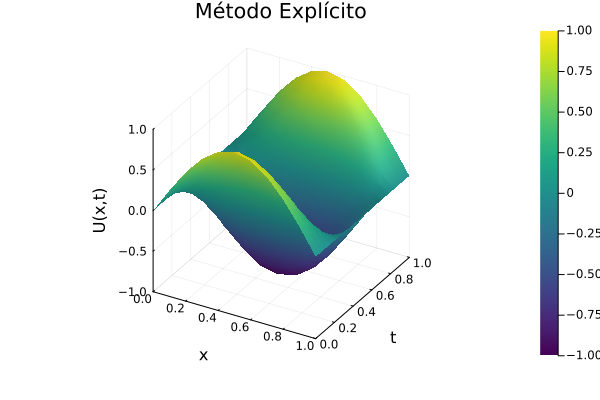

In [69]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)   
surface(xs, ys, S, camera=(30,30), c=:viridis, title="Método Explícito",xlabel="x",ylabel="t",zlabel="U(x,t)")

## Método Implicito

In [53]:

α = 1
λ = k*α^2/h^2

di = fill(-(k/h^2 + k/h),xn-1)

d  = fill(1 - k + 2*k/h^2 + k/h,xn)

ds = fill(-k/h^2,xn-1)

A  = Tridiagonal(di, d, ds)
A[1,1] = 1 - k + k/h^2
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
  5.95  -5.0     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
 -5.5   11.45  -5.0     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
   ⋅    -5.5   11.45  -5.0     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅ 
   ⋅      ⋅    -5.5   11.45  -5.0     ⋅      ⋅      ⋅      ⋅      ⋅ 
   ⋅      ⋅      ⋅    -5.5   11.45  -5.0     ⋅      ⋅      ⋅      ⋅ 
   ⋅      ⋅      ⋅      ⋅    -5.5   11.45  -5.0     ⋅      ⋅      ⋅ 
   ⋅      ⋅      ⋅      ⋅      ⋅    -5.5   11.45  -5.0     ⋅      ⋅ 
   ⋅      ⋅      ⋅      ⋅      ⋅      ⋅    -5.5   11.45  -5.0     ⋅ 
   ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅    -5.5   11.45  -5.0
   ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅    -5.5   11.45

In [54]:
U = zeros(tn+1,xn+1)
U[1,1:xn+1] = ci(LinRange(a, b, xn+1))
U[2:tn+1,xn+1] = cc(LinRange(t_min + k, t_max, tn))
U

ErrorException: invalid redefinition of constant U

In [55]:
for j in 2:tn+1
    C = zeros(xn)
    C[1] = -(k/h^2 + k/h)*2*h*(t_min + (j-1)*k)

    C[xn] = (-k/h^2)*U[j,xn+1]

    B = C + U[j-1,1:xn]
    U[j,1:xn] = crow_method(A, B)
end
U

MethodError: MethodError: no method matching getindex(::typeof(U), ::Int64, ::Int64)

In [56]:
println("x \t\t U(x,t) ")
for (index, value) in enumerate(U[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, xi, xi, t_max, value)
end

x 		 U(x,t) 


MethodError: MethodError: no method matching getindex(::typeof(U), ::Int64, ::Colon)

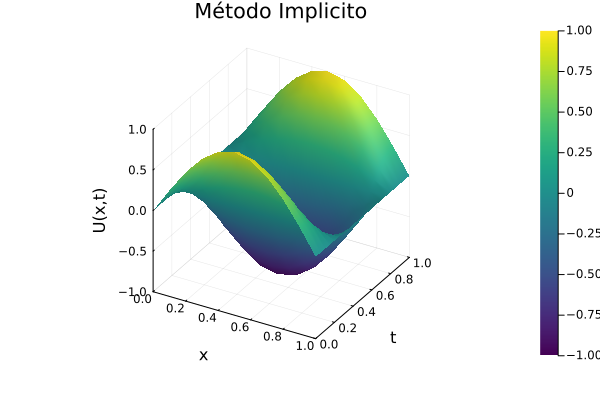

In [57]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)
surface(xs, ys, U, camera=(30,30), c=:viridis, title="Método Implicito",xlabel="x",ylabel="t",zlabel="U(x,t)")